In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Загрузка датасета
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

# Пути к данным
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [3]:
# Параметры
BATCH_SIZE = 32
IMG_SIZE = (150, 150)

# Генераторы для тренировочных и валидационных данных
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # Бинарная классификация: кошки (0) vs собаки (1)
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Для борьбы с переобучением
    Dense(1, activation='sigmoid')  # Выход: вероятность принадлежности к классу "собаки"
])

In [5]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [6]:
EPOCHS = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10
62/62 [==============================] - 43s 682ms/step - loss: 0.7410 - accuracy: 0.5523 - val_loss: 0.6694 - val_accuracy: 0.6058
Epoch 2/10
62/62 [==============================] - 26s 414ms/step - loss: 0.6528 - accuracy: 0.6123 - val_loss: 0.6228 - val_accuracy: 0.6522
Epoch 3/10
62/62 [==============================] - 26s 424ms/step - loss: 0.5935 - accuracy: 0.6860 - val_loss: 0.6075 - val_accuracy: 0.6905
Epoch 4/10
62/62 [==============================] - 27s 429ms/step - loss: 0.5651 - accuracy: 0.7175 - val_loss: 0.5921 - val_accuracy: 0.6895
Epoch 5/10
62/62 [==============================] - 25s 405ms/step - loss: 0.5004 - accuracy: 0.7510 - val_loss: 0.6043 - val_accuracy: 0.6784
Epoch 6/10
62/62 [==============================] - 25s 401ms/step - loss: 0.4248 - accuracy: 0.8089 - val_loss: 0.5984 - val_accuracy: 0.7117
Epoch 7/10
62/62 [==============================] - 25s 410ms/step - loss: 0.3829 - accuracy: 0.8166 - val_loss: 0.6302 - val_accuracy: 0.7087

In [7]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc * 100:.2f}%")

32/32 [==============================] - 3s 88ms/step - loss: 0.8999 - accuracy: 0.7050
Validation Accuracy: 70.50%


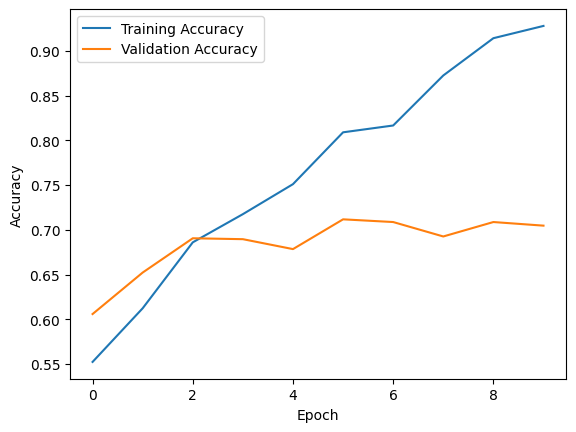

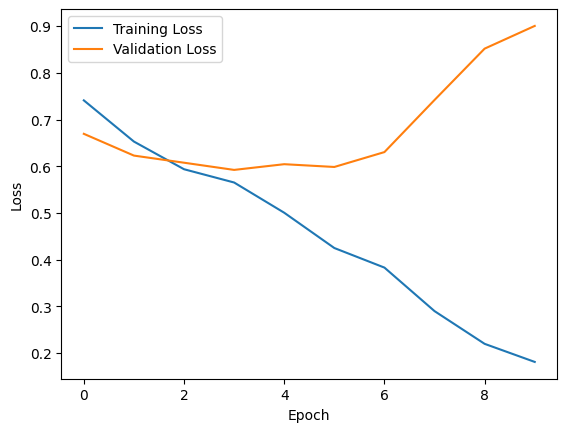

In [8]:
import matplotlib.pyplot as plt

# График точности
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# График потерь
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Загрузка изображения
img_path = 'dog.jpg'
img = image.load_img(img_path, target_size=IMG_SIZE)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

# Предсказание
prediction = model.predict(img_array)
print(prediction)
if prediction < 0.5:
    print("Это кошка!")
else:
    print("Это собака!")

1/1 [==============================] - 0s 244ms/step
[[0.99999976]]
Это собака!
